In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
data = pd.read_csv('heart_cleveland_upload.csv')

In [6]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [7]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

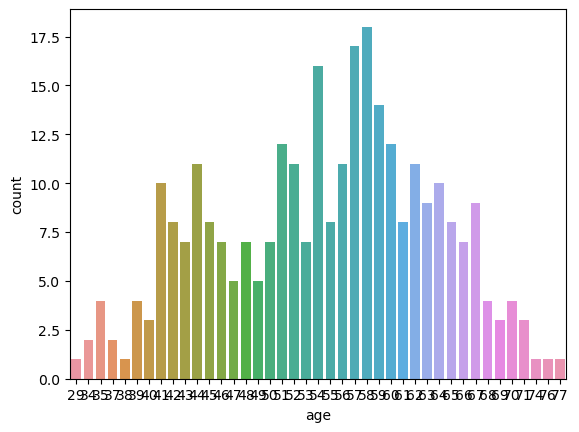

In [9]:
sns.countplot(x='age', data=data)
plt.show()

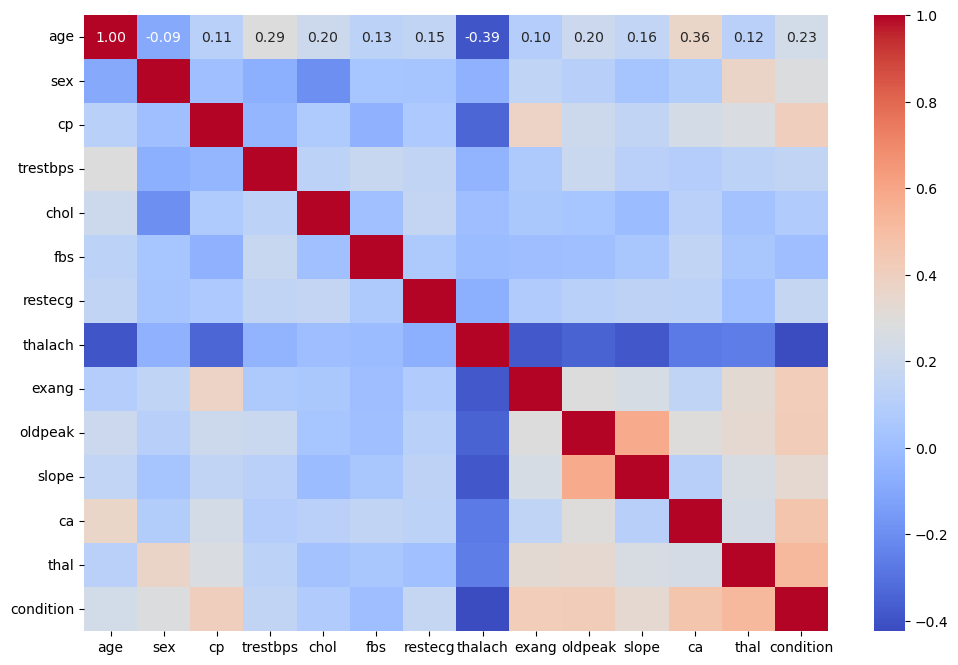

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
sns.pairplot(data, hue='age')
plt.show()

In [ ]:
data.dropna(inplace=True)


In [14]:
X = data.drop(['restecg', 'thalach'], axis=1)
y = data['age']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test_scaled)


In [25]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

          35       0.00      0.00      0.00         1
          37       1.00      0.00      0.00         1
          40       1.00      0.00      0.00         1
          41       0.00      0.00      0.00         2
          42       0.00      1.00      0.00         0
          43       1.00      0.00      0.00         2
          44       0.00      0.00      0.00         4
          45       1.00      0.00      0.00         2
          46       0.00      1.00      0.00         0
          47       0.00      1.00      0.00         0
          50       0.00      0.00      0.00         2
          51       0.25      0.50      0.33         2
          52       0.00      0.00      0.00         2
          53       0.00      1.00      0.00         0
          54       0.00      0.00      0.00         4
          55       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         2
          57       0.14    

In [27]:
cm = confusion_matrix(y_test, y_pred)
# Reemplazar cualquier valor NaN en la matriz de confusión con 0
cm = np.nan_to_num(cm)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


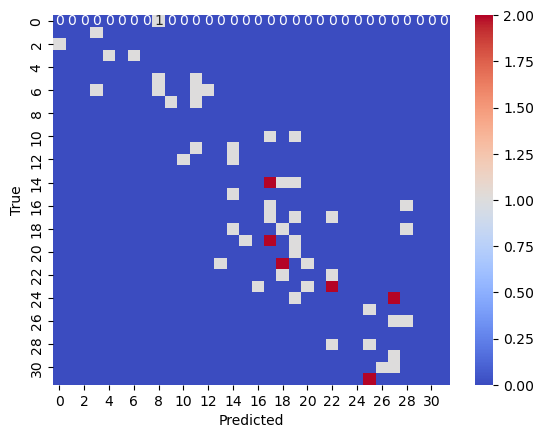

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [32]:
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 21.433333333333334


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [35]:
print("Coeficiente de determinación (R²):", r2)

Coeficiente de determinación (R²): 0.7448210175410747
